To run this ntbk, make sure you have created the entropy environment and have opened the ntbk in this environment. 
To make the environment go to the repo with the environment.ym file and enter into the terminal:

conda env create -f environment.yml

To activate:

source activate entropy

Then to launch ntbk in browser:

jupyter notebook

In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from glob import glob


## Background

For higher SNR(db) or stronger sinusodials, the power detector is consistently outputting a **higher** energy for just noise than for noise + sine.

This ntbk is going to analyze a sample of smaller signals. Note:
* haystack (noise + sine) = 100 samples
* needle (sine) = 10 samples
* noise sd = 10 (fixed across all haystacks)
* sine amplitude = 10 \* 10^(SNR dbs/20)
* sine freq and phase are randomly selected for each haystack
* NOTE: this behavior showed up in large haystacks/needles (1M sample hstack / 250K sample needle); I'm recreating the behavior here with smaller signals to make it eaiser to visually analyze

The dir power_detect contains 5 haystacks at each db level [-20, -10, -5.0, 0.5, 5.0, 10, 20]. Each haystack has a quantized (int8) and raw version of the haystack, the noise, and the sine. 
    

## Sine at 20 db

In [31]:
meta_20db_1 = pd.read_csv("1_20.0db.txt", squeeze=True, header=None, index_col=0).T

haystack_20db_1 = np.load("1_20.0db_quantized_haystack.npy")
raw_haystack_20db_1 = np.load("1_20.0db_raw_haystack.npy")

noise_20db_1 = np.load("1_20.0db_quantized_noise.npy")
raw_noise_20db_1 = np.load("1_20.0db_raw_noise.npy")

needle_20db_1 = np.load("1_20.0db_quantized_needle.npy")
raw_needle_20db_1 = np.load("1_20.0db_raw_needle.npy")

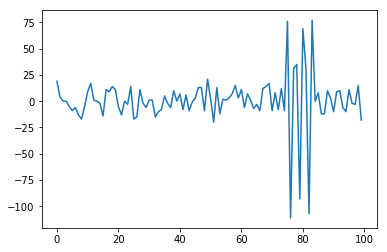

In [32]:
plt.plot(haystack_20db_1);

In [61]:
#Check to see if the quantization process is occuring correctly
#Check out raw haystack and raw noise
print("Raw Hstack:", "\n", raw_haystack_20db_1.T, "\n")
print("Quantized Hstack:", "\n", haystack_20db_1.T, "\n")
print("Raw Noise:", "\n", raw_noise_20db_1.T, "\n")
print("Quantized Noise:", "\n", noise_20db_1.T, "\n")

Raw Hstack: 
 [[ 1.94943403e+01  4.90639251e+00  9.59836583e-01  8.29948476e-01
  -5.86328007e+00 -9.07792461e+00 -6.00073293e+00 -1.39052584e+01
  -1.75542481e+01 -5.94986805e+00  9.91456624e+00  1.73689019e+01
   1.92632239e+00  4.64534884e-02 -2.18999431e+00 -1.42344711e+01
   1.16625529e+01  9.94082921e+00  1.48346418e+01  1.15023268e+01
  -5.85679717e+00 -1.33400507e+01 -8.05593170e-01 -3.74409991e+00
   1.48997270e+01 -1.79959103e+01 -1.52617559e+01  1.12526802e+01
  -2.16613816e+00 -6.15464067e+00  1.46380270e+00  1.81272634e+00
  -1.57335739e+01 -1.03439762e+01 -8.96386988e+00  5.22815351e+00
  -2.29300702e+00 -6.57007559e+00  1.02954949e+01 -8.17256564e-01
   7.20304447e+00 -8.05718479e+00  6.18014054e+00 -9.78596041e+00
  -1.23996969e+00  3.74835593e+00  1.32822139e+01  1.32504172e+01
  -9.50139723e+00  2.18364620e+01  2.69514916e+00 -2.05246581e+01
   1.34144758e+01 -1.27286252e+01  2.12930304e+00  1.98469871e+00
   3.02050705e+00  7.37547568e+00  1.56171241e+01  3.81854041e

In [63]:
#Their differences should be exactly the sine 
print("Hstack - Noise", "\n", (raw_haystack_20db_1 - raw_noise_20db_1).T,"\n")
print("Hstack - Noise with 0's removed:", "\n", (raw_haystack_20db_1 - raw_noise_20db_1)[np.nonzero((raw_haystack_20db_1 - raw_noise_20db_1))], "\n")
print("Sine:","\n", raw_needle_20db_1.T, '\n')

#Check to make sure quantization is right 
print(haystack_20db_1.T, "\n")

Hstack - Noise 
 [[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
   78.11598531 -96.22456151  33.83851685  56.85442306 -99.98699838
   59.4775659   30.78656581 -95

In [67]:
#Seems like the haystack is being created correctly
#Let's check the energy outputted by the 5 sigals at this db
for i in np.arange(1,6):
    quantized_hstack = np.load(str(i) + "_20.0db_quantized_haystack.npy")
    quantized_noise = np.load(str(i) + "_20.0db_quantized_noise.npy")
    print("Quantized Hstack " + str(i) + " Energy:", np.mean(np.power(quantized_hstack,2)))
    print("Quantized Noise " + str(i) + " Energy:", np.mean(np.power(quantized_noise,2)))

    raw_hstack = np.load(str(i) + "_20.0db_raw_haystack.npy")
    raw_noise = np.load(str(i) + "_20.0db_raw_noise.npy")
    print("Raw Hstack " + str(i) + " Energy:", np.mean(np.power(raw_hstack,2)))
    print("Raw Noise " + str(i) + " Energy:", np.mean(np.power(raw_noise,2)))
    
    print('\n')

Quantized Hstack 1 Energy: 11.9
Quantized Noise 1 Energy: 15.22
Raw Hstack 1 Energy: 623.5266326106473
Raw Noise 1 Energy: 105.8415556142779


Quantized Hstack 2 Energy: 8.52
Quantized Noise 2 Energy: 14.49
Raw Hstack 2 Energy: 647.8079872046704
Raw Noise 2 Energy: 98.30841743852041


Quantized Hstack 3 Energy: 7.84
Quantized Noise 3 Energy: 10.2
Raw Hstack 3 Energy: 576.6059086516734
Raw Noise 3 Energy: 109.17976727424725


Quantized Hstack 4 Energy: 17.63
Quantized Noise 4 Energy: 23.12
Raw Hstack 4 Energy: 593.8626120760699
Raw Noise 4 Energy: 103.08714748528975


Quantized Hstack 5 Energy: 20.86
Quantized Noise 5 Energy: 24.75
Raw Hstack 5 Energy: 611.0727172753109
Raw Noise 5 Energy: 89.16147884860551




## Sine at 10 db

In [69]:
meta_10db_1 = pd.read_csv("1_10.0db.txt", squeeze=True, header=None, index_col=0).T

haystack_10db_1 = np.load("1_10.0db_quantized_haystack.npy")
raw_haystack_10db_1 = np.load("1_10.0db_raw_haystack.npy")

noise_10db_1 = np.load("1_10.0db_quantized_noise.npy")
raw_noise_10db_1 = np.load("1_10.0db_raw_noise.npy")

needle_10db_1 = np.load("1_10.0db_quantized_needle.npy")
raw_needle_10db_1 = np.load("1_10.0db_raw_needle.npy")

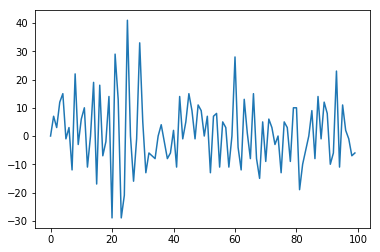

In [70]:
plt.plot(haystack_10db_1);

In [71]:
#Check to see if the quantization process is occuring correctly
#Check out raw haystack and raw noise
print("Raw Hstack:", "\n", raw_haystack_10db_1.T, "\n")
print("Quantized Hstack:", "\n", haystack_10db_1.T, "\n")
print("Raw Noise:", "\n", raw_noise_10db_1.T, "\n")
print("Quantized Noise:", "\n", noise_10db_1.T, "\n")

Raw Hstack: 
 [[ -0.22832372   7.17974391   3.89283413  12.67743301  15.92625674
   -1.53570925   3.64362334 -12.49663834  22.44937561  -3.0684469
    6.91228748  10.39477032 -11.28738125   0.84534515  19.92324405
  -17.03777344  18.35501026  -7.65200413  -2.59927842  14.97973936
  -29.10296593  29.76182612  13.88011916 -29.87954231 -21.02176837
   41.00879328  -0.32854053 -16.78288689  -1.73069115  33.28726873
    5.14689635 -13.96227564  -6.833447    -7.19962829  -8.76416222
    0.2729175    4.68171613  -2.43758582  -8.18236001  -6.76904154
    2.0726901  -11.98304853  14.8358866   -1.58076757   5.01362173
   15.08551467   9.06643535  -1.57444602  11.0789766    9.51606057
   -0.22832022   7.42583035 -13.40189141   7.87674349   8.63485123
  -11.76799824   5.17199475   3.7218877  -11.30184477  -0.13746413
   28.32696642  -4.3840624  -12.33871371  13.99715087   1.86639983
   -8.95996329  15.02524653  -8.68921673 -15.07345626   5.53289021
   -9.55406694   6.30510002   3.52116555  -3.0473

In [72]:
#Their differences should be exactly the sine 
print("Hstack - Noise", "\n", (raw_haystack_10db_1 - raw_noise_10db_1).T,"\n")
print("Hstack - Noise with 0's removed:", "\n", (raw_haystack_10db_1 - raw_noise_10db_1)[np.nonzero((raw_haystack_10db_1 - raw_noise_10db_1))], "\n")
print("Sine:","\n", raw_needle_10db_1.T, '\n')

#Check to make sure quantization is right 
print(haystack_10db_1.T, "\n")

Hstack - Noise 
 [[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
  -26.3346354   20.22793015  21.99947014 -24.94276445 -16.65384133
   28.51194597  10.5432805  -30.77153768  -3.94845343  31.61775368
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.    

In [74]:
#Seems like the haystack is being created correctly
#Let's check the energy outputted by the 5 sigals at this db
for i in np.arange(1,6):
    quantized_hstack = np.load(str(i) + "_10.0db_quantized_haystack.npy")
    quantized_noise = np.load(str(i) + "_10.0db_quantized_noise.npy")
    print("Quantized Hstack " + str(i) + " Energy:", np.mean(np.power(quantized_hstack,2)))
    print("Quantized Noise " + str(i) + " Energy:", np.mean(np.power(quantized_noise,2)))

    raw_hstack = np.load(str(i) + "_10.0db_raw_haystack.npy")
    raw_noise = np.load(str(i) + "_10.0db_raw_noise.npy")
    print("Raw Hstack " + str(i) + " Energy:", np.mean(np.power(raw_hstack,2)))
    print("Raw Noise " + str(i) + " Energy:", np.mean(np.power(raw_noise,2)))
    
    print('\n')

Quantized Hstack 1 Energy: 22.09
Quantized Noise 1 Energy: 22.8
Raw Hstack 1 Energy: 159.22012806883288
Raw Noise 1 Energy: 102.7306151138634


Quantized Hstack 2 Energy: 16.18
Quantized Noise 2 Energy: 16.08
Raw Hstack 2 Energy: 151.76184651245873
Raw Noise 2 Energy: 111.87508377606925


Quantized Hstack 3 Energy: 21.85
Quantized Noise 3 Energy: 22.79
Raw Hstack 3 Energy: 178.043595329291
Raw Noise 3 Energy: 79.6907268603403


Quantized Hstack 4 Energy: 18.76
Quantized Noise 4 Energy: 20.61
Raw Hstack 4 Energy: 128.9596261570029
Raw Noise 4 Energy: 70.03783780479881


Quantized Hstack 5 Energy: 14.1
Quantized Noise 5 Energy: 19.41
Raw Hstack 5 Energy: 167.01029149848688
Raw Noise 5 Energy: 109.61085185763432




## Sine at 5 db

In [82]:
meta_5db_1 = pd.read_csv("1_5.0db.txt", squeeze=True, header=None, index_col=0).T

haystack_5db_1 = np.load("1_5.0db_quantized_haystack.npy")
raw_haystack_5db_1 = np.load("1_5.0db_raw_haystack.npy")

noise_5db_1 = np.load("1_5.0db_quantized_noise.npy")
raw_noise_5db_1 = np.load("1_5.0db_raw_noise.npy")

needle_5db_1 = np.load("1_5.0db_quantized_needle.npy")
raw_needle_5db_1 = np.load("1_5.0db_raw_needle.npy")

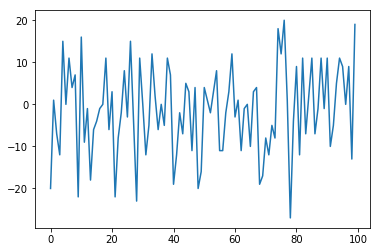

In [83]:
plt.plot(haystack_5db_1);

In [84]:
#Check to see if the quantization process is occuring correctly
#Check out raw haystack and raw noise
print("Raw Hstack:", "\n", raw_haystack_5db_1.T, "\n")
print("Quantized Hstack:", "\n", haystack_5db_1.T, "\n")
print("Raw Noise:", "\n", raw_noise_5db_1.T, "\n")
print("Quantized Noise:", "\n", noise_5db_1.T, "\n")

Raw Hstack: 
 [[-20.4897672    1.36131348  -7.9407847  -12.23813961  15.35141896
    0.33968053  11.46801216   4.22870532   7.59133649 -22.65158046
   16.48246667  -9.48272562  -1.88223397 -18.14412091  -6.72841868
   -4.89991699  -1.40585042   0.42188398  11.58636981  -6.15915018
    3.64973906 -22.86978871  -8.88820282  -2.77704555   8.04585098
   -3.12640042  15.50305552  -4.39895006 -23.86830963  11.9135269
   -0.15912792 -12.72642712  -5.87647725  12.39194305   2.71693907
   -6.67401086   0.58054716  -5.74099536  11.21129705   7.68563092
  -19.81371611 -12.17022563  -2.65625152  -7.49666501   5.01325873
    3.21735727 -11.01480469   4.9635693  -20.54327018 -16.28942601
    4.02416975   1.85991306  -2.44640482   3.771889     8.52366975
  -11.86025983 -11.57782653  -2.94872514   3.58717587  12.1424863
   -3.48650977   1.87128781 -11.93320228  -1.20242944   0.77241875
  -10.77015308   3.9603865    4.63117151 -19.67621854 -17.69959684
   -8.46580326 -12.94199385  -5.58167538  -8.18795

In [85]:
#Their differences should be exactly the sine 
print("Hstack - Noise", "\n", (raw_haystack_5db_1 - raw_noise_5db_1).T,"\n")
print("Hstack - Noise with 0's removed:", "\n", (raw_haystack_5db_1 - raw_noise_5db_1)[np.nonzero((raw_haystack_5db_1 - raw_noise_5db_1))], "\n")
print("Sine:","\n", raw_needle_5db_1.T, '\n')

#Check to make sure quantization is right 
print(haystack_5db_1.T, "\n")

Hstack - Noise 
 [[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.         -14.08374803 -16.53742428  -2.85268855  13.61590652
   16.79711747   3.58648909 -13.12409415 -17.02723926  -4.31397559
   12.60917676   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.    

In [86]:
#Seems like the haystack is being created correctly
#Let's check the energy outputted by the 5 sigals at this db
for i in np.arange(1,6):
    quantized_hstack = np.load(str(i) + "_5.0db_quantized_haystack.npy")
    quantized_noise = np.load(str(i) + "_5.0db_quantized_noise.npy")
    print("Quantized Hstack " + str(i) + " Energy:", np.mean(np.power(quantized_hstack,2)))
    print("Quantized Noise " + str(i) + " Energy:", np.mean(np.power(quantized_noise,2)))

    raw_hstack = np.load(str(i) + "_5.0db_raw_haystack.npy")
    raw_noise = np.load(str(i) + "_5.0db_raw_noise.npy")
    print("Raw Hstack " + str(i) + " Energy:", np.mean(np.power(raw_hstack,2)))
    print("Raw Noise " + str(i) + " Energy:", np.mean(np.power(raw_noise,2)))
    
    print('\n')

Quantized Hstack 1 Energy: 22.02
Quantized Noise 1 Energy: 23.18
Raw Hstack 1 Energy: 118.32182517365862
Raw Noise 1 Energy: 114.31561196990471


Quantized Hstack 2 Energy: 16.63
Quantized Noise 2 Energy: 20.02
Raw Hstack 2 Energy: 111.57031000799796
Raw Noise 2 Energy: 112.66055690855372


Quantized Hstack 3 Energy: 18.72
Quantized Noise 3 Energy: 19.13
Raw Hstack 3 Energy: 104.62402493568896
Raw Noise 3 Energy: 96.89699712140073


Quantized Hstack 4 Energy: 21.14
Quantized Noise 4 Energy: 22.8
Raw Hstack 4 Energy: 122.6769420883917
Raw Noise 4 Energy: 105.52068708396519


Quantized Hstack 5 Energy: 20.66
Quantized Noise 5 Energy: 20.35
Raw Hstack 5 Energy: 117.92657996275467
Raw Noise 5 Energy: 104.38465785813064




## Sine at 0.5 db

In [100]:
meta_point5db_1 = pd.read_csv("1_0.5db.txt", squeeze=True, header=None, index_col=0).T

haystack_point5db_1 = np.load("1_0.5db_quantized_haystack.npy")
raw_haystack_point5db_1 = np.load("1_0.5db_raw_haystack.npy")

noise_point5db_1 = np.load("1_0.5db_quantized_noise.npy")
raw_noise_point5db_1 = np.load("1_0.5db_raw_noise.npy")

needle_point5db_1 = np.load("1_0.5db_quantized_needle.npy")
raw_needle_point5db_1 = np.load("1_0.5db_raw_needle.npy")

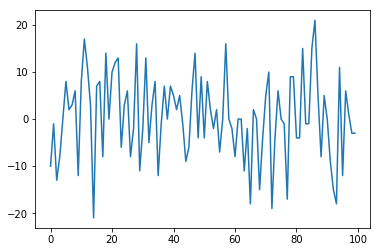

In [101]:
plt.plot(haystack_point5db_1);

In [102]:
#Check to see if the quantization process is occuring correctly
#Check out raw haystack and raw noise
print("Raw Hstack:", "\n", raw_haystack_point5db_1.T, "\n")
print("Quantized Hstack:", "\n", haystack_point5db_1.T, "\n")
print("Raw Noise:", "\n", raw_noise_point5db_1.T, "\n")
print("Quantized Noise:", "\n", noise_point5db_1.T, "\n")

Raw Hstack: 
 [[-10.19098602  -1.74794432 -13.9818028   -8.81124716   0.29916016
    8.33691681   2.14993776   3.92206648   6.20201622 -12.87151583
    8.14530491  17.78531111  11.31017219   3.98644904 -21.43739727
    7.69771351   8.65493849  -8.73130459  14.51105622   0.98103822
   10.3286988   12.71533078  13.52122169  -6.41179384   3.36072739
    6.76147231  -8.98652219  -2.63414637  16.48111961 -11.88799381
   -2.33544623  13.0797971   -5.7145163    3.16644551   8.89262086
  -12.11820869  -1.46537503   7.84370609   0.66509387   7.95809837
    5.62740358   2.25677175   5.07968705  -1.25576214  -9.71394633
   -6.98995705   6.65912089  14.92531277  -4.37726347   9.97910598
   -4.42230829   8.68409437   2.89933884  -2.29356558   2.26958962
   -7.62290648   0.6711965   16.88025233   0.2326405   -2.22398508
   -8.70478051  -0.3248846    0.19700479 -11.87855685  -2.95153156
  -18.16888204   2.34163007   0.77568034 -15.70097095  -4.41095431
    5.00933306  10.09934162 -19.86344443  -4.085

In [103]:
#Their differences should be exactly the sine 
print("Hstack - Noise", "\n", (raw_haystack_point5db_1 - raw_noise_point5db_1).T,"\n")
print("Hstack - Noise with 0's removed:", "\n", (raw_haystack_point5db_1 - raw_noise_point5db_1)[np.nonzero((raw_haystack_point5db_1 - raw_noise_point5db_1))], "\n")
print("Sine:","\n", raw_needle_point5db_1.T, '\n')

#Check to make sure quantization is right 
print(haystack_point5db_1.T, "\n")

Hstack - Noise 
 [[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           9.47875418  -7.81048053  -3.8816728   10.59213251
   -3.7087728   -7.9343827    9.39464391   1.20207138 -10.25606227
    6.14754237   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.    

In [104]:
#Seems like the haystack is being created correctly
#Let's check the energy outputted by the 5 sigals at this db
for i in np.arange(1,6):
    quantized_hstack = np.load(str(i) + "_0.5db_quantized_haystack.npy")
    quantized_noise = np.load(str(i) + "_0.5db_quantized_noise.npy")
    print("Quantized Hstack " + str(i) + " Energy:", np.mean(np.power(quantized_hstack,2)))
    print("Quantized Noise " + str(i) + " Energy:", np.mean(np.power(quantized_noise,2)))

    raw_hstack = np.load(str(i) + "_0.5db_raw_haystack.npy")
    raw_noise = np.load(str(i) + "_0.5db_raw_noise.npy")
    print("Raw Hstack " + str(i) + " Energy:", np.mean(np.power(raw_hstack,2)))
    print("Raw Noise " + str(i) + " Energy:", np.mean(np.power(raw_noise,2)))
    
    print('\n')

Quantized Hstack 1 Energy: 18.36
Quantized Noise 1 Energy: 20.45
Raw Hstack 1 Energy: 87.6099597723756
Raw Noise 1 Energy: 86.79402228866651


Quantized Hstack 2 Energy: 19.66
Quantized Noise 2 Energy: 19.61
Raw Hstack 2 Energy: 109.41708409520626
Raw Noise 2 Energy: 103.8490990756113


Quantized Hstack 3 Energy: 18.75
Quantized Noise 3 Energy: 25.2
Raw Hstack 3 Energy: 125.42697623342161
Raw Noise 3 Energy: 121.30855277427638


Quantized Hstack 4 Energy: 15.35
Quantized Noise 4 Energy: 15.65
Raw Hstack 4 Energy: 121.56355394673731
Raw Noise 4 Energy: 116.72111681021792


Quantized Hstack 5 Energy: 16.35
Quantized Noise 5 Energy: 16.39
Raw Hstack 5 Energy: 121.52213700627713
Raw Noise 5 Energy: 118.01899750991548




## Sine at -5 db

In [90]:
meta_minus5db_1 = pd.read_csv("1_-5.0db.txt", squeeze=True, header=None, index_col=0).T

haystack_minus5db_1 = np.load("1_-5.0db_quantized_haystack.npy")
raw_haystack_minus5db_1 = np.load("1_-5.0db_raw_haystack.npy")

noise_minus5db_1 = np.load("1_-5.0db_quantized_noise.npy")
raw_noise_minus5db_1 = np.load("1_-5.0db_raw_noise.npy")

needle_minus5db_1 = np.load("1_-5.0db_quantized_needle.npy")
raw_needle_minus5db_1 = np.load("1_-5.0db_raw_needle.npy")

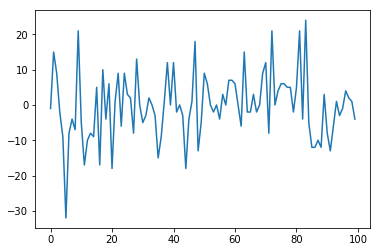

In [91]:
plt.plot(haystack_minus5db_1);

In [92]:
#Check to see if the quantization process is occuring correctly
#Check out raw haystack and raw noise
print("Raw Hstack:", "\n", raw_haystack_minus5db_1.T, "\n")
print("Quantized Hstack:", "\n", haystack_minus5db_1.T, "\n")
print("Raw Noise:", "\n", raw_noise_minus5db_1.T, "\n")
print("Quantized Noise:", "\n", noise_minus5db_1.T, "\n")

Raw Hstack: 
 [[ -1.10395293  15.23675082   9.95309551  -2.90357926  -9.28859251
  -32.15489181  -8.57546346  -4.42504283  -7.05880028  21.67758614
   -5.90294348 -17.22516351 -10.5852172   -8.61936694  -9.67355617
    5.49291841 -17.24519918  10.0561864   -4.99855911   6.7896516
  -18.50921217   1.8723923    9.91521897  -6.77708365   9.98962831
    3.15656142   2.02614046  -8.27038511  13.45742334  -0.8344754
   -5.00054485  -3.93089688   2.25735355   0.15472536  -3.01191361
  -15.68025084  -9.93350127   1.43216267  12.71530011  -0.3447119
   12.08856693  -2.17204624  -0.43757983  -3.75968592 -18.49710189
   -4.98908884   1.7806126   18.56968578 -13.73555772  -5.12623638
    9.43738329   6.43128104   0.44775891  -2.12411645  -0.46280836
   -4.01129206   3.03812981   0.45676833   7.10410362   7.80535922
    6.78606315  -0.45805963  -6.80444729  15.99078372  -2.61585019
   -2.48941941   3.05907923  -2.24956902   0.9199747    9.09059503
   12.23529472  -8.6129892   21.21087421   0.459671

In [93]:
#Their differences should be exactly the sine 
print("Hstack - Noise", "\n", (raw_haystack_minus5db_1 - raw_noise_minus5db_1).T,"\n")
print("Hstack - Noise with 0's removed:", "\n", (raw_haystack_minus5db_1 - raw_noise_minus5db_1)[np.nonzero((raw_haystack_minus5db_1 - raw_noise_minus5db_1))], "\n")
print("Sine:","\n", raw_needle_minus5db_1.T, '\n')

#Check to make sure quantization is right 
print(haystack_minus5db_1.T, "\n")


Hstack - Noise 
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          5.60657287  3.07925939 -1.84588965
  -5.33363467 -4.66805019 -0.36743036  4.21930943  5.52045067  2.5227878
  -2.43938326  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.   

In [94]:
#Seems like the haystack is being created correctly
#Let's check the energy outputted by the 5 sigals at this db
for i in np.arange(1,6):
    quantized_hstack = np.load(str(i) + "_-5.0db_quantized_haystack.npy")
    quantized_noise = np.load(str(i) + "_-5.0db_quantized_noise.npy")
    print("Quantized Hstack " + str(i) + " Energy:", np.mean(np.power(quantized_hstack,2)))
    print("Quantized Noise " + str(i) + " Energy:", np.mean(np.power(quantized_noise,2)))

    raw_hstack = np.load(str(i) + "_-5.0db_raw_haystack.npy")
    raw_noise = np.load(str(i) + "_-5.0db_raw_noise.npy")
    print("Raw Hstack " + str(i) + " Energy:", np.mean(np.power(raw_hstack,2)))
    print("Raw Noise " + str(i) + " Energy:", np.mean(np.power(raw_noise,2)))
    
    print('\n')

Quantized Hstack 1 Energy: 12.45
Quantized Noise 1 Energy: 10.13
Raw Hstack 1 Energy: 93.10363706593196
Raw Noise 1 Energy: 90.63769311610186


Quantized Hstack 2 Energy: 12.27
Quantized Noise 2 Energy: 15.29
Raw Hstack 2 Energy: 94.27808846042322
Raw Noise 2 Energy: 94.914104096983


Quantized Hstack 3 Energy: 19.52
Quantized Noise 3 Energy: 18.51
Raw Hstack 3 Energy: 88.82261441382947
Raw Noise 3 Energy: 90.56535707462477


Quantized Hstack 4 Energy: 18.33
Quantized Noise 4 Energy: 20.5
Raw Hstack 4 Energy: 92.30784829883329
Raw Noise 4 Energy: 94.96985163163383


Quantized Hstack 5 Energy: 18.2
Quantized Noise 5 Energy: 18.76
Raw Hstack 5 Energy: 89.87814031672897
Raw Noise 5 Energy: 87.73728867822305




## Sine at -10 db

In [95]:
meta_minus10db_1 = pd.read_csv("1_-10.0db.txt", squeeze=True, header=None, index_col=0).T

haystack_minus10db_1 = np.load("1_-10.0db_quantized_haystack.npy")
raw_haystack_minus10db_1 = np.load("1_-10.0db_raw_haystack.npy")

noise_minus10db_1 = np.load("1_-10.0db_quantized_noise.npy")
raw_noise_minus10db_1 = np.load("1_-10.0db_raw_noise.npy")

needle_minus10db_1 = np.load("1_-10.0db_quantized_needle.npy")
raw_needle_minus10db_1 = np.load("1_-10.0db_raw_needle.npy")

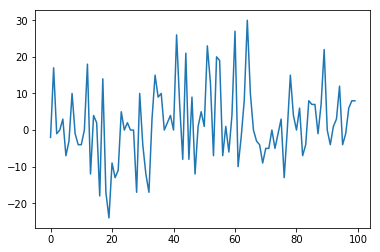

In [96]:
plt.plot(haystack_minus10db_1);

In [97]:
#Check to see if the quantization process is occuring correctly
#Check out raw haystack and raw noise
print("Raw Hstack:", "\n", raw_haystack_minus10db_1.T, "\n")
print("Quantized Hstack:", "\n", haystack_minus10db_1.T, "\n")
print("Raw Noise:", "\n", raw_noise_minus10db_1.T, "\n")
print("Quantized Noise:", "\n", noise_minus10db_1.T, "\n")

Raw Hstack: 
 [[-2.40889743e+00  1.78013674e+01 -1.07354073e+00  1.06860756e-01
   3.56833481e+00 -7.53726777e+00 -3.47988474e+00  1.04636788e+01
  -1.02991098e+00 -4.69078650e+00 -4.81741505e+00 -9.44257039e-01
   1.87235108e+01 -1.29978719e+01  4.14833785e+00  2.13929665e+00
  -1.84846766e+01  1.44523636e+01 -1.74242596e+01 -2.44459819e+01
  -9.50321209e+00 -1.36192079e+01 -1.13678048e+01  5.20842634e+00
   6.05778045e-01  2.31403419e+00  8.03651293e-01 -5.02629389e-01
  -1.72438952e+01  1.01111684e+01 -4.43754786e+00 -1.27047374e+01
  -1.73409185e+01  3.53939312e+00  1.57497988e+01  9.97928013e+00
   1.05559707e+01  9.23209700e-01  2.49779827e+00  4.84226018e+00
  -1.08537128e-01  2.68913658e+01  7.06472446e+00 -8.51367523e+00
   2.12932567e+01 -8.42413498e+00  9.46735738e+00 -1.22358724e+01
   1.76997773e+00  5.12267171e+00  1.45759054e+00  2.36022319e+01
   1.30765300e+01 -7.76668079e+00  2.04449159e+01  1.94835329e+01
  -7.98209751e+00  1.39395063e+00 -6.24092552e+00  4.88945439e

In [98]:
#Their differences should be exactly the sine 
print("Hstack - Noise", "\n", (raw_haystack_minus10db_1 - raw_noise_minus10db_1).T,"\n")
print("Hstack - Noise with 0's removed:", "\n", (raw_haystack_minus10db_1 - raw_noise_minus10db_1)[np.nonzero((raw_haystack_minus10db_1 - raw_noise_minus10db_1))], "\n")
print("Sine:","\n", raw_needle_minus10db_1.T, '\n')

#Check to make sure quantization is right 
print(haystack_minus10db_1.T, "\n")


Hstack - Noise 
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          2.99472847
   2.35005574  1.32321729  0.08119744 -1.17402673 -2.23833085 -2.93863792
  -3.16106413 -2.86943856 -2.1111853   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.  

In [99]:
#Seems like the haystack is being created correctly
#Let's check the energy outputted by the 5 sigals at this db
for i in np.arange(1,6):
    quantized_hstack = np.load(str(i) + "_-10.0db_quantized_haystack.npy")
    quantized_noise = np.load(str(i) + "_-10.0db_quantized_noise.npy")
    print("Quantized Hstack " + str(i) + " Energy:", np.mean(np.power(quantized_hstack,2)))
    print("Quantized Noise " + str(i) + " Energy:", np.mean(np.power(quantized_noise,2)))

    raw_hstack = np.load(str(i) + "_-10.0db_raw_haystack.npy")
    raw_noise = np.load(str(i) + "_-10.0db_raw_noise.npy")
    print("Raw Hstack " + str(i) + " Energy:", np.mean(np.power(raw_hstack,2)))
    print("Raw Noise " + str(i) + " Energy:", np.mean(np.power(raw_noise,2)))
    
    print('\n')

Quantized Hstack 1 Energy: 13.7
Quantized Noise 1 Energy: 17.28
Raw Hstack 1 Energy: 116.84146451715536
Raw Noise 1 Energy: 115.60336708264985


Quantized Hstack 2 Energy: 15.11
Quantized Noise 2 Energy: 15.16
Raw Hstack 2 Energy: 101.90400226244556
Raw Noise 2 Energy: 101.94194711924379


Quantized Hstack 3 Energy: 14.18
Quantized Noise 3 Energy: 14.76
Raw Hstack 3 Energy: 95.79752754921849
Raw Noise 3 Energy: 96.28542547581412


Quantized Hstack 4 Energy: 20.46
Quantized Noise 4 Energy: 17.43
Raw Hstack 4 Energy: 105.22341638046102
Raw Noise 4 Energy: 104.74841051334033


Quantized Hstack 5 Energy: 33.75
Quantized Noise 5 Energy: 28.61
Raw Hstack 5 Energy: 105.41780584702543
Raw Noise 5 Energy: 102.71186883405308




## Sine at -20 db

In [95]:
meta_minus20db_1 = pd.read_csv("1_-20.0db.txt", squeeze=True, header=None, index_col=0).T

haystack_minus20db_1 = np.load("1_-20.0db_quantized_haystack.npy")
raw_haystack_minus20db_1 = np.load("1_-20.0db_raw_haystack.npy")

noise_minus20db_1 = np.load("1_-20.0db_quantized_noise.npy")
raw_noise_minus20db_1 = np.load("1_-20.0db_raw_noise.npy")

needle_minus20db_1 = np.load("1_-20.0db_quantized_needle.npy")
raw_needle_minus20db_1 = np.load("1_-20.0db_raw_needle.npy")

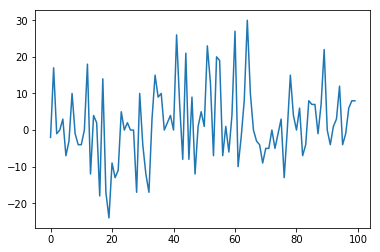

In [96]:
plt.plot(haystack_minus20db_1);

In [97]:
#Check to see if the quantization process is occuring correctly
#Check out raw haystack and raw noise
print("Raw Hstack:", "\n", raw_haystack_minus20db_1.T, "\n")
print("Quantized Hstack:", "\n", haystack_minus20db_1.T, "\n")
print("Raw Noise:", "\n", raw_noise_minus20db_1.T, "\n")
print("Quantized Noise:", "\n", noise_minus20db_1.T, "\n")

Raw Hstack: 
 [[-2.40889743e+00  1.78013674e+01 -1.07354073e+00  1.06860756e-01
   3.56833481e+00 -7.53726777e+00 -3.47988474e+00  1.04636788e+01
  -1.02991098e+00 -4.69078650e+00 -4.81741505e+00 -9.44257039e-01
   1.87235108e+01 -1.29978719e+01  4.14833785e+00  2.13929665e+00
  -1.84846766e+01  1.44523636e+01 -1.74242596e+01 -2.44459819e+01
  -9.50321209e+00 -1.36192079e+01 -1.13678048e+01  5.20842634e+00
   6.05778045e-01  2.31403419e+00  8.03651293e-01 -5.02629389e-01
  -1.72438952e+01  1.01111684e+01 -4.43754786e+00 -1.27047374e+01
  -1.73409185e+01  3.53939312e+00  1.57497988e+01  9.97928013e+00
   1.05559707e+01  9.23209700e-01  2.49779827e+00  4.84226018e+00
  -1.08537128e-01  2.68913658e+01  7.06472446e+00 -8.51367523e+00
   2.12932567e+01 -8.42413498e+00  9.46735738e+00 -1.22358724e+01
   1.76997773e+00  5.12267171e+00  1.45759054e+00  2.36022319e+01
   1.30765300e+01 -7.76668079e+00  2.04449159e+01  1.94835329e+01
  -7.98209751e+00  1.39395063e+00 -6.24092552e+00  4.88945439e

In [98]:
#Their differences should be exactly the sine 
print("Hstack - Noise", "\n", (raw_haystack_minus20db_1 - raw_noise_minus20db_1).T,"\n")
print("Hstack - Noise with 0's removed:", "\n", (raw_haystack_minus20db_1 - raw_noise_minus20db_1)[np.nonzero((raw_haystack_minus20db_1 - raw_noise_minus20db_1))], "\n")
print("Sine:","\n", raw_needle_minus20db_1.T, '\n')

#Check to make sure quantization is right 
print(haystack_minus20db_1.T, "\n")


Hstack - Noise 
 [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          2.99472847
   2.35005574  1.32321729  0.08119744 -1.17402673 -2.23833085 -2.93863792
  -3.16106413 -2.86943856 -2.1111853   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.  

In [99]:
#Seems like the haystack is being created correctly
#Let's check the energy outputted by the 5 sigals at this db
for i in np.arange(1,6):
    quantized_hstack = np.load(str(i) + "_-20.0db_quantized_haystack.npy")
    quantized_noise = np.load(str(i) + "_-20.0db_quantized_noise.npy")
    print("Quantized Hstack " + str(i) + " Energy:", np.mean(np.power(quantized_hstack,2)))
    print("Quantized Noise " + str(i) + " Energy:", np.mean(np.power(quantized_noise,2)))

    raw_hstack = np.load(str(i) + "_-20.0db_raw_haystack.npy")
    raw_noise = np.load(str(i) + "_-20.0db_raw_noise.npy")
    print("Raw Hstack " + str(i) + " Energy:", np.mean(np.power(raw_hstack,2)))
    print("Raw Noise " + str(i) + " Energy:", np.mean(np.power(raw_noise,2)))
    
    print('\n')

Quantized Hstack 1 Energy: 13.7
Quantized Noise 1 Energy: 17.28
Raw Hstack 1 Energy: 116.84146451715536
Raw Noise 1 Energy: 115.60336708264985


Quantized Hstack 2 Energy: 15.11
Quantized Noise 2 Energy: 15.16
Raw Hstack 2 Energy: 101.90400226244556
Raw Noise 2 Energy: 101.94194711924379


Quantized Hstack 3 Energy: 14.18
Quantized Noise 3 Energy: 14.76
Raw Hstack 3 Energy: 95.79752754921849
Raw Noise 3 Energy: 96.28542547581412


Quantized Hstack 4 Energy: 20.46
Quantized Noise 4 Energy: 17.43
Raw Hstack 4 Energy: 105.22341638046102
Raw Noise 4 Energy: 104.74841051334033


Quantized Hstack 5 Energy: 33.75
Quantized Noise 5 Energy: 28.61
Raw Hstack 5 Energy: 105.41780584702543
Raw Noise 5 Energy: 102.71186883405308




*Thoughts: Seems like keeping a fixed noise power and increasing amplitude to increase SNR isn't working. As amplitude increases it tends to cancel out noise, resulting in lower energy in haystack than in noise itself. Maybe we should try fixing sine and varying noise? Will that make a differnece?*

*Also, using raw files to calculate energy usually results in higher energy for haystack than noise*